<a href="https://colab.research.google.com/github/khushboo28sahu/Deep_Learning/blob/main/Lab_6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [16]:
# importing libraries
from keras.datasets import reuters
import numpy as np
from keras import models
from keras import layers
import matplotlib.pyplot as plt


In [2]:
# Classifying newswires: a multiclass classification example
# The Reuters dataset
# Loading the Reuters dataset
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)


2121728/2110848 [==============================] - 0s 0us/step


In [4]:
# Checking

print(f"{len(train_data)},{len(test_data)}")


8982,2246


In [5]:
#each example is a list of integers (word indices):
>>> train_data[10]

[1,
 245,
 273,
 207,
 156,
 53,
 74,
 160,
 26,
 14,
 46,
 296,
 26,
 39,
 74,
 2979,
 3554,
 14,
 46,
 4689,
 4329,
 86,
 61,
 3499,
 4795,
 14,
 61,
 451,
 4329,
 17,
 12]

In [6]:
# Can you decode newswires back to text?
# Preparing the data
# Encoding the data
def vectorize_sequences(sequences, dimension=10000):
	results = np.zeros((len(sequences), dimension))
	for i, sequence in enumerate(sequences):
		results[i, sequence] = 1.
	return results

In [7]:
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [11]:
# Note that there is a built-in way to do this in Keras:
# from keras.utils.np_utils import to_categorical
# one_hot_train_labels = to_categorical(train_labels)
# one_hot_test_labels = to_categorical(test_labels)


# One hot-encoders
def to_one_hot(labels, dimension=46):
  results = np.zeros((len(labels), dimension))
  for i, label in enumerate(labels):
    results[i, label] = 1.
  return results

one_hot_train_labels = to_one_hot(train_labels)
one_hot_test_labels = to_one_hot(test_labels)

In [12]:
# Building your network
# Model definition
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

In [13]:
# Compiling the model
model.compile(optimizer='rmsprop',loss='categorical_crossentropy',metrics=['accuracy'])


In [14]:
# Validating your approach
# Setting aside a validation set
x_val = x_train[:1000]
partial_x_train = x_train[1000:]
y_val = one_hot_train_labels[:1000]
partial_y_train = one_hot_train_labels[1000:]

In [15]:
# Training the model
history = model.fit(partial_x_train, partial_y_train, epochs=20, batch_size=512, validation_data=(x_val, y_val))

Epoch 1/20
16/16 [==============================] - 2s 57ms/step - loss: 2.5924 - accuracy: 0.5583 - val_loss: 1.6781 - val_accuracy: 0.6760
Epoch 2/20
16/16 [==============================] - 1s 44ms/step - loss: 1.3710 - accuracy: 0.7171 - val_loss: 1.2802 - val_accuracy: 0.7090
Epoch 3/20
16/16 [==============================] - 1s 44ms/step - loss: 1.0242 - accuracy: 0.7873 - val_loss: 1.1312 - val_accuracy: 0.7600
Epoch 4/20
16/16 [==============================] - 1s 44ms/step - loss: 0.8099 - accuracy: 0.8301 - val_loss: 1.0591 - val_accuracy: 0.7740
Epoch 5/20
16/16 [==============================] - 1s 45ms/step - loss: 0.6537 - accuracy: 0.8619 - val_loss: 0.9796 - val_accuracy: 0.8010
Epoch 6/20
16/16 [==============================] - 1s 44ms/step - loss: 0.5247 - accuracy: 0.8881 - val_loss: 0.9210 - val_accuracy: 0.8140
Epoch 7/20
16/16 [==============================] - 1s 43ms/step - loss: 0.4240 - accuracy: 0.9113 - val_loss: 0.9024 - val_accuracy: 0.8210
Epoch 8/20
16

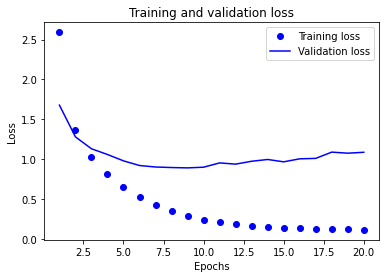

In [17]:
# Plotting the training and validation loss
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

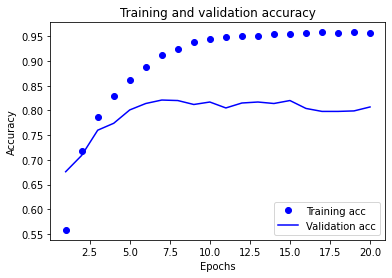

In [20]:
# Plotting the training and validation accuracy
plt.clf()
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [21]:
# Retraining a model from scratch
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(partial_x_train, partial_y_train, epochs=9, batch_size=512, validation_data=(x_val, y_val))
results = model.evaluate(x_test, one_hot_test_labels)


Epoch 1/9
16/16 [==============================] - 1s 54ms/step - loss: 2.6393 - accuracy: 0.5327 - val_loss: 1.7073 - val_accuracy: 0.6410
Epoch 2/9
16/16 [==============================] - 1s 44ms/step - loss: 1.4026 - accuracy: 0.7036 - val_loss: 1.3082 - val_accuracy: 0.7210
Epoch 3/9
16/16 [==============================] - 1s 43ms/step - loss: 1.0380 - accuracy: 0.7765 - val_loss: 1.1308 - val_accuracy: 0.7480
Epoch 4/9
16/16 [==============================] - 1s 44ms/step - loss: 0.8191 - accuracy: 0.8235 - val_loss: 1.0216 - val_accuracy: 0.7760
Epoch 5/9
16/16 [==============================] - 1s 44ms/step - loss: 0.6532 - accuracy: 0.8634 - val_loss: 0.9832 - val_accuracy: 0.7860
Epoch 6/9
16/16 [==============================] - 1s 44ms/step - loss: 0.5223 - accuracy: 0.8936 - val_loss: 0.9229 - val_accuracy: 0.8110
Epoch 7/9
16/16 [==============================] - 1s 44ms/step - loss: 0.4190 - accuracy: 0.9166 - val_loss: 0.9086 - val_accuracy: 0.8110
Epoch 8/9
16/16 [===

In [22]:
# Checking
>>> results


[0.9820802211761475, 0.7876224517822266]

In [23]:
# Generating predictions on new data
predictions = model.predict(x_test)


In [24]:
# Each entry in predictions is a vector of length 46:
>>> predictions[0].shape

(46,)

In [25]:
#The coefficients in this vector sum to 1:
>>> np.sum(predictions[0])

0.9999999

In [26]:
# The largest entry is the predicted class—the class with the highest probability:
>>> np.argmax(predictions[0])

3

In [27]:

# The importance of having sufficiently large intermediate layers
# We mentioned earlier that because the final outputs are 46-dimensional, you should
# avoid intermediate layers with many fewer than 46 hidden units. Now let’s see what
# happens when you introduce an information bottleneck by having intermediate layers
# that are significantly less than 46-dimensional: for example, 4-dimensional. Perform 
# the following and check what is the accuracy of the model?

model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(4, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(partial_x_train, partial_y_train, epochs=20, batch_size=128, validation_data=(x_val, y_val))

Epoch 1/20
63/63 [==============================] - 2s 18ms/step - loss: 3.6129 - accuracy: 0.1622 - val_loss: 3.3987 - val_accuracy: 0.1250
Epoch 2/20
63/63 [==============================] - 1s 15ms/step - loss: 3.1224 - accuracy: 0.1696 - val_loss: 2.8365 - val_accuracy: 0.1490
Epoch 3/20
63/63 [==============================] - 1s 15ms/step - loss: 2.5628 - accuracy: 0.3918 - val_loss: 2.4469 - val_accuracy: 0.3900
Epoch 4/20
63/63 [==============================] - 1s 15ms/step - loss: 2.2865 - accuracy: 0.3735 - val_loss: 2.2278 - val_accuracy: 0.3730
Epoch 5/20
63/63 [==============================] - 1s 15ms/step - loss: 2.0300 - accuracy: 0.3789 - val_loss: 1.9972 - val_accuracy: 0.3810
Epoch 6/20
63/63 [==============================] - 1s 15ms/step - loss: 1.7558 - accuracy: 0.4139 - val_loss: 1.7493 - val_accuracy: 0.5210
Epoch 7/20
63/63 [==============================] - 1s 15ms/step - loss: 1.4775 - accuracy: 0.5988 - val_loss: 1.5498 - val_accuracy: 0.6250
Epoch 8/20
63